# Analysis notebook: `SU2020b_CRY_offspill-LH_as`  

## Define analysis name

In [1]:
ana_label = "SU2020b_CRY_offspill-LH_as"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020b_CRY_offspill-LH_as

analysis.csv  events.parquet  info.txt	   SU2020b_CRY_offspill-LH_as.log
cut_flow.csv  hists.h5	      results.pkl  SU2020b_CRY_offspill-LH_as.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020b_CRY_offspill-LH_as


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020b_CRY_offspill-LH_as/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020b_CRY_offspill-LH_as/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020b_CRY_offspill-LH_as/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020b_CRY_offspill-LH_as/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/SU2020b_CRY_offspill-LH_as/events.parquet
[Load] ✅ Loaded info from ../../../output/results/SU2020b_CRY_offspill-LH_as/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,5754129,100.000,100.000,No selection applied
1,has_trk_front,Preselect,5732419,99.623,99.623,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,5246599,91.180,91.525,Electron track fits
3,is_downstream,Preselect,3256493,56.594,62.069,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,2109815,36.666,64.788,One reco electron / event
5,is_truth_electron,Preselect,845921,14.701,40.095,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,645533,11.219,76.311,Track fit quality > 0.2
7,has_hits,Tracker,640205,11.126,99.175,>20 active tracker hits
8,within_t0err,Tracker,604722,10.509,94.458,Track fit t0 uncertainty (t0err < 0.9 ns)
9,within_d0,Tracker,77177,1.341,12.762,Distance of closest approach (d_0 < 100 mm)


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,26738,4279,482,12,1,0
1,N,41100000000,41100000000,41100000000,26738,4279,482
2,Eff [%],0.000065,0.00001,0.000001,99.95512,99.97663,100.0
3,Eff Err$-$ [%],-0.0,-0.0,-0.0,-0.014955,-0.037797,-0.207039
4,Eff Err$+$ [%],0.0,0.0,0.0,0.011218,0.014443,0.0
5,Rate 1B [$\text{day}^{-1}$],147.346251,23.58047,2.656178,0.066129,0.005511,0.0
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-0.896124,-0.358489,-0.120294,-0.018736,-0.00455,0.0
7,Rate 1B Err$+$ [$\text{day}^{-1}$],0.901611,0.364001,0.125889,0.024999,0.012611,0.006279
8,Rate 2B [$\text{day}^{-1}$],163.86294,26.223709,2.953921,0.073542,0.006128,0.0
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-0.996575,-0.398673,-0.133778,-0.020836,-0.00506,0.0


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_offspill-LH_as/h1o_1x3_mom_windows.png


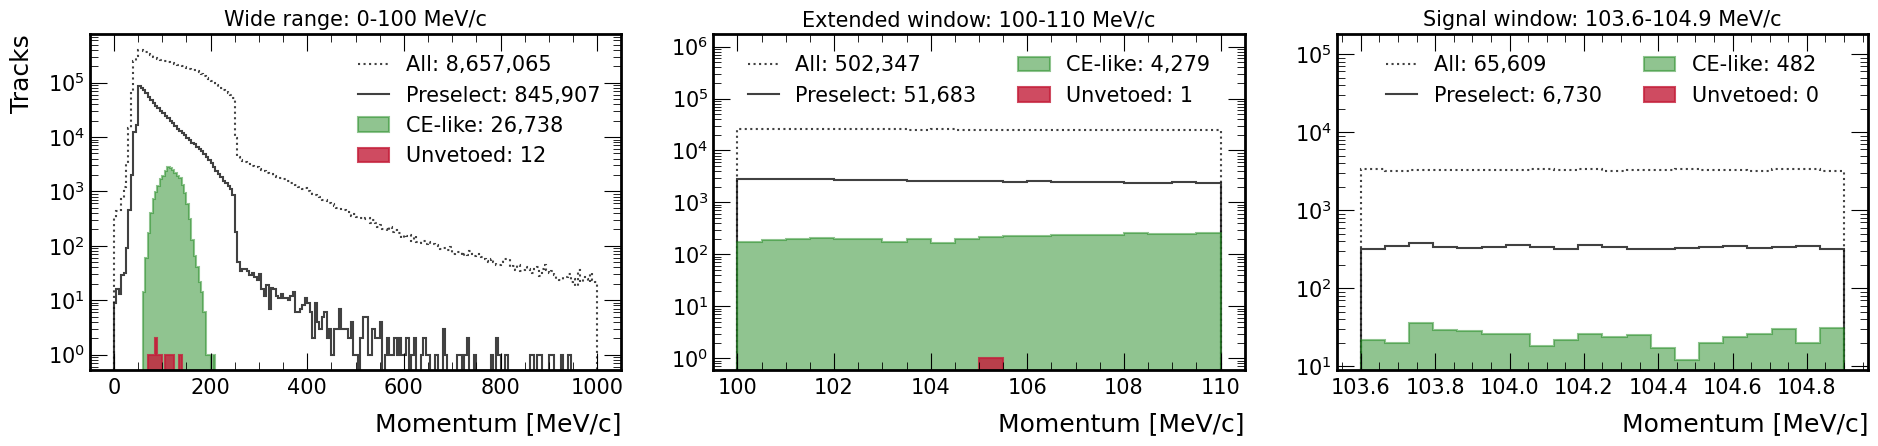

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

KeyError: 'mom_z'

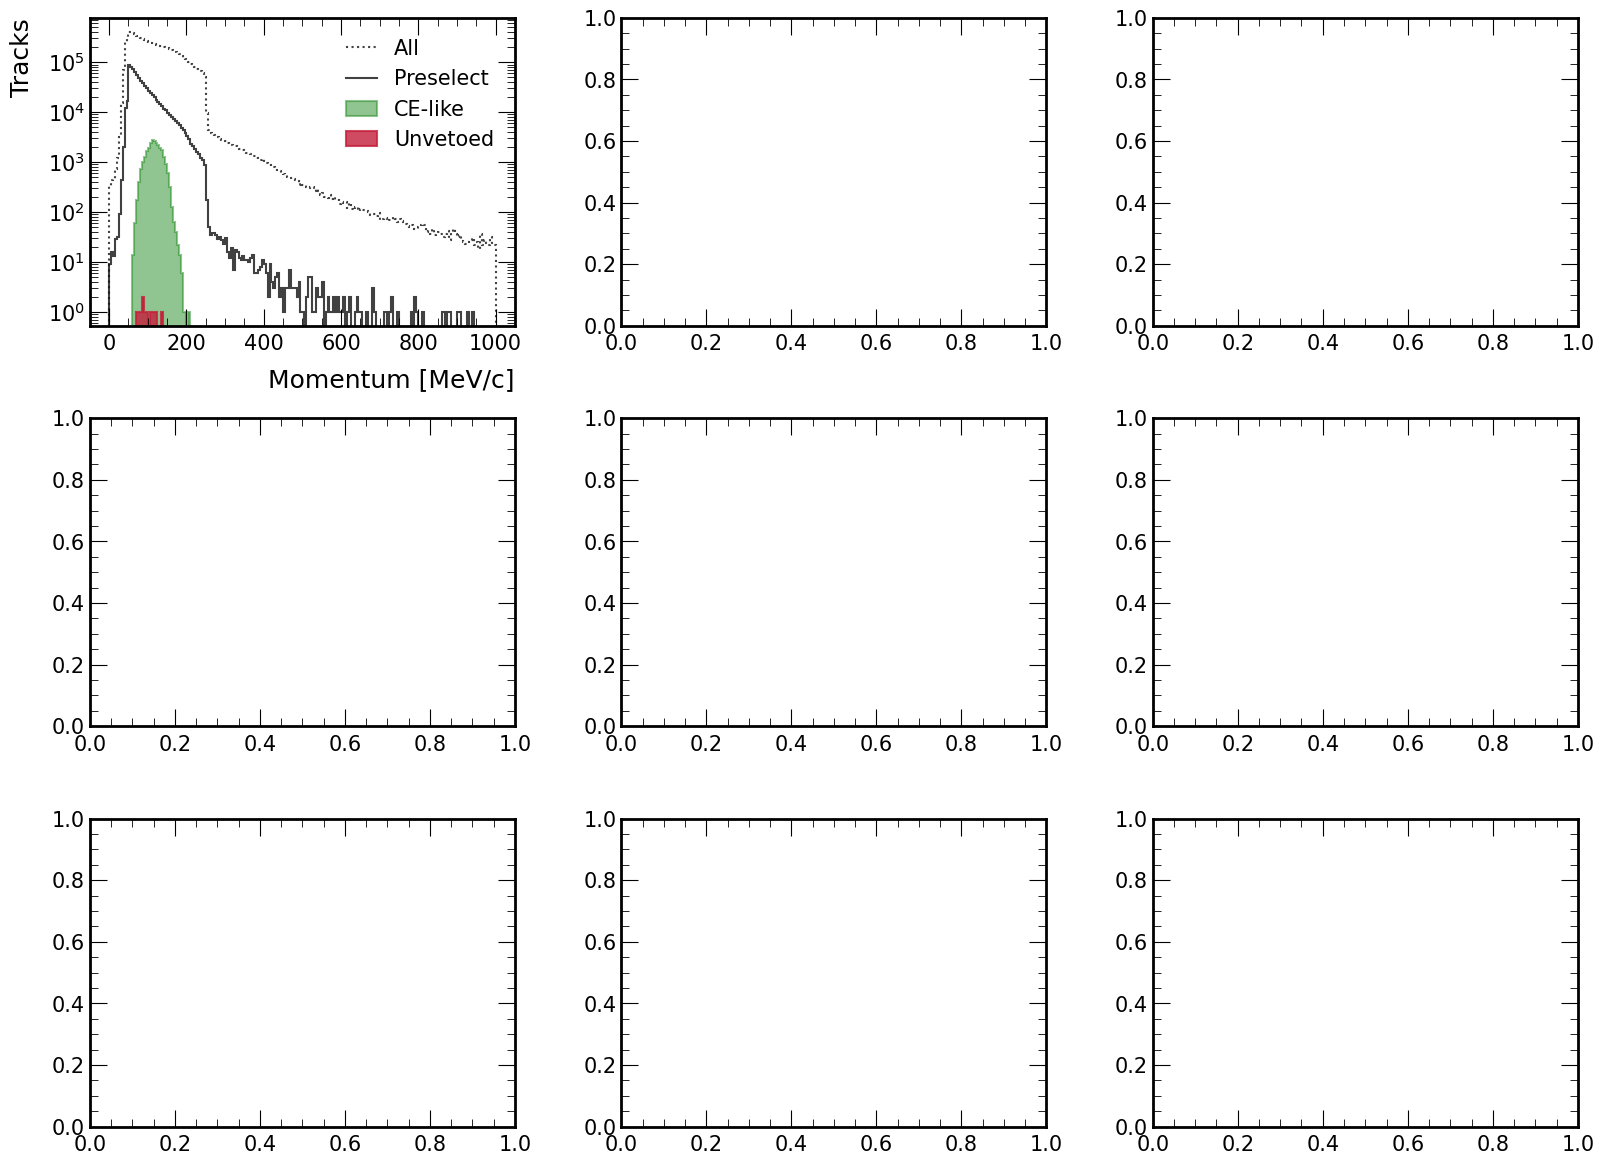

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

In [ ]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [ ]:
print(results["event_info"])

In [ ]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))